# LATAR BELAKANG
Pertumbuhan populasi dan urbanisasi Jakarta telah memberikan tekanan pada sistem transportasi.
Transjakarta telah menjadi tulang punggung transportasi publik di Jakarta, menyediakan layanan bus yang menghubungkan berbagai wilayah kota. Transjakarta merupakan sistem BRT dengan jalur lintasan terpanjang di dunia (230,9 km), serta memiliki 252 halte yang tersebar dalam 14 koridor (rute utama).

# PERNYATAAN MASALAH
Jakarta memiliki populasi lebih dari 10 juta penduduk. Kepadatan lalu lintas, peningkatan volume penumpang, dan tantangan operasional membuat diperlukan pemahaman mendalam untuk meningkatkan efisiensi. Rute Transjakarta mencakup jaringan yang kompleks, dengan berbagai faktor yang mempengaruhi efisiensi.

Melalui analisis data ini, kita dapat memahami perjalanan penumpang, menentukan jam sibuk, koridor dan halte yang paling penuh dengan penumpang. Dari analisis data juga akan terlihat koridor mana saja yang ramai dengan penumpang perempuan. Untuk mencegah dan melindungi perempuan yang lebih rentan terhadap kejahatan maka diharapkan melalui analisis ini didapatkan solusi penambahan armada khusus wanita pada koridor yang ramai dengan penumpang wanita. Dikarenakan menurut survei yang dilakukan oleh Koalisi Ruang Publik Aman (KRPA) pada tahun 2022, tercatat 3.539 perempuan dari 4.263 responden yang mengaku pernah mengalami pelecehan seksual di ruang publik, dan 23 persen di antaranya terjadi di transportasi umum termasuk sarana dan prasarana.

# IMPORTING LIBRARY

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

Dataset terdiri dari 22 kolom, diantaranya: 
1. transID: Unique transaction id for every transaction
2. payCardID: Customers main identifier. The card customers use as a ticket for entrance and exit.
3. payCardBank: Customers card bank issuer name
4. payCardName: Customers name that is embedded in the card.
5. payCardSex: Customers sex that is embedded in the card
6. payCardBirthDate: Customers birth year
7. corridorID: Corridor ID / Route ID as key for route grouping.
8. corridorName: Corridor Name / Route Name contains Start and Finish for each route.
9. direction: 0 for Go, 1 for Back. Direction of the route.
10. tapInStops: Tap In (entrance) Stops ID for identifying stops name
11. tapInStopsName: Tap In (entrance) Stops Name where customers tap in.
12. tapInStopsLat: Latitude of Tap In Stops
13. tapInStopsLon: Longitude of Tap In Stops
14. stopStartSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
15. tapInTime: Time of tap in. Date and time
16. tapOutStops: Tap Out (Exit) Stops ID for identifying stops name
17. tapOutStopsName: Tap out (exit) Stops Name where customers tap out.
18. tapOutStopsLat: Latitude of Tap Out Stops
19. tapOutStopsLon: Longitude of Tap Out Stops
20. stopEndSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
21. tapOutTime: Time of tap out. Date and time
22. payAmount: The number of what customers pay. Some are free. Some not.

Berikut 5 baris teratas dan terbawah:

In [2]:
# Membaca Dataset
df = pd.read_csv('Transjakarta.csv')
display(df.head(), df.tail())


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


# DATA UNDERSTANDING DAN CLEANING
Pertama, melihat informasi dari RAW database

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nul

In [4]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


# Unique Value

In [7]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

Secara umum, kita bisa melihat bahwa:

- dataset transjakarta memiliki 22 kolom dan 37.900 baris
- Tap in terbanyak berada di halte Penjaringan
- Tap out terbanyak ada di halte BKN
- Penumpang paling banyak adalah perempuan
- dari table Unique, kita dapat melihat distinct/ kategori/ nilai unik dari masing-masing variable. Dari unik data yang ada, dapat dilihat bahwa masih ada ketidaksesuaian jumlah unik antara corridorID dan CorridorName yang seharusnya memiliki jumlah unique yang sama. oleh karena perlu ada tindak lebih lanjut.

# DUPLIKAT DATA

In [11]:
# Menghitung data duplikat
len(df[df.duplicated()])

0

# MISSING VALUE

In [15]:
missing_values = df.isnull().sum()

# cek persentase missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage}).sort_values(by='Percentage (%)', ascending=False)
missing_info[missing_info['Missing Values'] > 0]

,Missing Values,Percentage (%)
tapOutStops,2289,6.039578
corridorName,1930,5.092348
tapOutTime,1344,3.546174
stopEndSeq,1344,3.546174
tapOutStopsLon,1344,3.546174
tapOutStopsLat,1344,3.546174
tapOutStopsName,1344,3.546174
corridorID,1257,3.316623
tapInStops,1213,3.200528
payAmount,1007,2.656992


Anomali data kedua berupa missing value yang banyak ditemukan pada data ini. Oleh karena itu missing value tersebut akan diisi oleh masing-masing nilai yang paling mewakilkan data pada kolom tersebut, dengan menggunakan aturan yang sesuai.

Dari hasil pengecekan missing value bahwa banyak ditemukan pada kolom tapOutStops, corridorName, tapOutTime, stopEndSeq, tapOutStopsLon, tapOutStopsLat, tapOutStopsName, corridorID, tapInStops, dan payAmount yang memiliki data kosong

# DATA CLEANING
Dalam data ini, digunakan 2 cara untuk menangani missing value:

1. Mengisi data yang hilang. (pengisian nilai yang paling mendekati dan rasional)
2. Menghapus baris sisa yang memang tidak bisa diisi missing valuenya.

1. Missing Value Corridor ID

In [50]:
corridor_id_mapping = df.dropna(subset=['corridorID']).drop_duplicates('corridorName')
corridor_id_mapping = corridor_id_mapping.set_index('corridorName')['corridorID']

In [51]:
def fill_missing_corridor_id(row):
    if pd.isnull(row['corridorID']) and pd.notnull(row['corridorName']):
        return corridor_id_mapping.get(row['corridorName'])
    return row['corridorID']

In [52]:
df['corridorID'] = df.apply(fill_missing_corridor_id, axis=1)

In [53]:
# Missing Value Corridor ID menggunakan tapInStopsLat dan tapInStopLon
corridor_id_mapping1 = df.dropna(subset=['corridorID']).drop_duplicates(['tapInStopsLat', 'tapInStopsLon'])
corridor_id_mapping1 = corridor_id_mapping1.set_index(['tapInStopsLat', 'tapInStopsLon'])['corridorID']

In [54]:
def fill_missing_corridor_id1(row):
    if pd.isnull(row['corridorID']) and pd.notnull(row['tapInStopsLat']) and pd.notnull(row['tapInStopsLon']):
        return corridor_id_mapping1.get((row['tapInStopsLat'], row['tapInStopsLon']))
    return row['corridorID']

In [55]:
df['corridorID'] = df.apply(fill_missing_corridor_id1, axis=1)

2. Missing Value Corridor Name

In [56]:
corridor_name_mapping = df.dropna(subset=['corridorName']).drop_duplicates('corridorID')
corridor_name_mapping = corridor_name_mapping.set_index('corridorID')['corridorName']

In [57]:
def fill_missing_corridor_name(row):
    if pd.isnull(row['corridorName']) and pd.notnull(row['corridorID']):
        return corridor_name_mapping.get(row['corridorID'])
    return row['corridorName']

In [58]:
df['corridorName'] = df.apply(fill_missing_corridor_name, axis=1)

missing value pada kolom corridorName adalah sekitar 5% dari data. Nilai kosong tersebut diisi berdasarkan mapping dengan corridorID karena keduanya bisa saling mengisi dimana satu corridorName akan memiliki satu corridorID.

3. Missing Value tapInStops

In [59]:
tap_in_stops_mapping = df.dropna(subset=['tapInStops']).drop_duplicates(['tapInStopsLon', 'tapInStopsLat'])
tap_in_stops_mapping = tap_in_stops_mapping.set_index(['tapInStopsLon', 'tapInStopsLat'])['tapInStops']

In [60]:
def fill_missing_tapInStops(row):
    if pd.isnull(row['tapInStops']) and pd.notnull(row['tapInStopsLon']) and pd.notnull(row['tapInStopsLat']):
        return tap_in_stops_mapping.get((row['tapInStopsLon'], row['tapInStopsLat']))
    return row['tapInStops']

In [61]:
df['tapInStops'] = df.apply(fill_missing_tapInStops, axis=1)

Missing Value pada kolom tapInStops atau titik awal halte pengguna diisi berdasarkan mapping dari lokasi halte tersebut berdasarkan latitude dan longitude. Hal ini dilakukan karena latitude dan longitude pada halte tap in dapat merepresentasikan lokasi tapInStop, dan satu latitude dan longitude dapat digunakan untuk menentukan satu nama dan lokasi tap in stops itu sendiri.

4. Missing Value tapOutStops

In [62]:
tap_out_stops_mapping = df.dropna(subset=['tapOutStops']).drop_duplicates(['tapOutStopsLon', 'tapOutStopsLat'])
tap_out_stops_mapping = tap_out_stops_mapping.set_index(['tapOutStopsLon', 'tapOutStopsLat'])['tapOutStops']

In [63]:
def fill_missing_tapOutStops(row):
    if pd.isnull(row['tapOutStops']) and pd.notnull(row['tapOutStopsLon']) and pd.notnull(row['tapOutStopsLat']):
        return tap_out_stops_mapping.get((row['tapOutStopsLon'], row['tapOutStopsLat']))
    return row['tapOutStops']

In [64]:
df['tapOutStops'] = df.apply(fill_missing_tapOutStops, axis=1)

latitude dan longitude pada halte tap out dapat merepresentasikan lokasi tapsOutStops, dan satu latitude dan longitude dapat digunakan untuk menentukan satu nama dan lokasi tap out stops itu sendiri.

5. Missing Value tapOutStopsName

In [65]:
tap_out_stops_name_mapping = df.dropna(subset=['tapOutStopsName']).drop_duplicates('tapOutStops')
tap_out_stops_name_mapping = tap_out_stops_name_mapping.set_index('tapOutStops')['tapOutStopsName']

In [66]:
def fill_missing_tapOutStopsName(row):
    if pd.isnull(row['tapOutStopsName']) and pd.notnull(row['tapOutStops']):
        return tap_out_stops_name_mapping.get(row['tapOutStops'])
    return row['tapOutStopsName']

In [67]:
df['tapOutStopsName'] = df.apply(fill_missing_tapOutStopsName, axis=1)

Missing value tapOutStopsName atau nama halte tap out diisi berdasarkan mapping dengan ID tapOutStops, karena keduanya bisa saling mewakilkan.

6. Missing Value tapOutStopsLat

In [68]:
tap_out_stops_lat_mapping = df.dropna(subset=['tapOutStopsLat']).drop_duplicates('tapOutStops')
tap_out_stops_lat_mapping = tap_out_stops_lat_mapping.set_index('tapOutStops')['tapOutStopsLat']

In [69]:
def fill_missing_tapOutStopsLat(row):
    if pd.isnull(row['tapOutStopsLat']) and pd.notnull(row['tapOutStops']):
        return tap_out_stops_lat_mapping.get(row['tapOutStops'])
    return row['tapOutStopsLat']

In [70]:
df['tapOutStopsLat'] = df.apply(fill_missing_tapOutStopsLat, axis=1)

Latitude dan longitude pada halte tap out dapat saling merepresentasikan lokasi tapOuStop, dan satu latitude dan longitude dapat digunakan untuk menentukan satu nama dan lokasi tap out stops itu sendiri.

7. Missing Value tapOutStopsLon

In [71]:
tap_out_stops_lon_mapping = df.dropna(subset=['tapOutStopsLon']).drop_duplicates('tapOutStops')
tap_out_stops_lon_mapping = tap_out_stops_lon_mapping.set_index('tapOutStops')['tapOutStopsLon']

In [72]:
def fill_missing_tapOutStopsLon(row):
    if pd.isnull(row['tapOutStopsLon']) and pd.notnull(row['tapOutStops']):
        return tap_out_stops_lon_mapping.get(row['tapOutStops'])
    return row['tapOutStopsLon']

In [73]:
df['tapOutStopsLon'] = df.apply(fill_missing_tapOutStopsLon, axis=1)

8. Missing Value payAmount

In [74]:
filtered_data_20k = df[df['payAmount'] == 20000]['corridorName'].unique()
filtered_data_20k

array(['Cibubur - Balai Kota', 'Bekasi Barat - Kuningan',
       'Palem Semi - Bundaran Senayan', 'Cinere - Bundaran Senayan',
       'Bintaro - Fatmawati', 'Senen - Blok M',
       'Stasiun Tebet - Karet via Patra Kuningan', 'Cibubur - BKN',
       'Bekasi Barat - Blok M', 'Cinere - Kuningan',
       'Cibubur Junction - Blok M', 'Cibubur - Kuningan',
       'BSD Serpong - Fatmawati', 'Tanah Abang - Blok M'], dtype=object)

In [76]:
target_corridors = [
    'Cibubur - Balai Kota', 'Bekasi Barat - Kuningan',
       'Palem Semi - Bundaran Senayan', 'Cinere - Bundaran Senayan',
       'Bintaro - Fatmawati','Bekasi Barat - Blok M',
       'Cinere - Kuningan', 'Cibubur Junction - Blok M',
       'Cibubur - Kuningan', 'BSD Serpong - Fatmawati'
]

In [77]:
def fill_pay_amount(row):
    if row['corridorName'] in target_corridors and pd.isna(row['payAmount']):
        return 20000
    elif pd.isna(row['payAmount']):
        return 3500
    else:
        return row['payAmount']

In [78]:
df['payAmount'] = df.apply(fill_pay_amount, axis=1)

In [79]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName          33
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1363
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount              0
dtype: int64

Setelah mengisi missing value, ternyata masih tersisa 3% missing value dari missing value awal sekitar 6%. Maka baris yang memiliki nilai kosong akan dihapus

Karena kita ingin mengetahui jam sibuk operasional maka perlu mengubah tipe datanya, seperti waktu dan tanggal dipecah berdasarka jam, hari dan minggu. berikut adalah modifikasi waktu yang dibutuhkan:

In [80]:
# Jam
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

In [81]:
df["tapInHour"] = df["tapInTime"].dt.hour

In [82]:
df["tapOutHour"] = df["tapOutTime"].dt.hour

In [83]:
# Hari
df['tapInDay'] = df['tapInTime'].dt.dayofweek

In [84]:
tapInDay = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
df['tapInDay'] = df['tapInDay'].map(tapInDay)

In [85]:
# Mingguan
df["tapInWeek"] =df['tapOutTime'].dt.strftime('%d')

In [86]:
# DataFrame setelah data cleaning
df.head(5)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDay,tapInWeek
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6.0,Monday,03
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,5,6.0,Monday,03
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,5,6.0,Monday,03
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,5,6.0,Monday,03
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,6,6.0,Monday,03


# ANALISIS DATA
Setelah melakukan data cleaning, maka selanjutnya dapat dilakukan analisis data. Analisis berdasarkan pernyataan masalah diatas sehingga hasilnya diperoleh jawaban permasalahan tersebut.

1. Mengetahui Gender Penumpang

In [87]:
gender_data = df['payCardSex'].value_counts().reset_index()
gender_data

,payCardSex,count
0,F,20157
1,M,17743


In [88]:
gender_data1 = df.groupby('payCardName')['payCardSex'].value_counts().reset_index(name='count')

In [89]:
grouped_gender_data1 = gender_data1['payCardSex'].value_counts().reset_index()
grouped_gender_data1

,payCardSex,count
0,F,1067
1,M,932


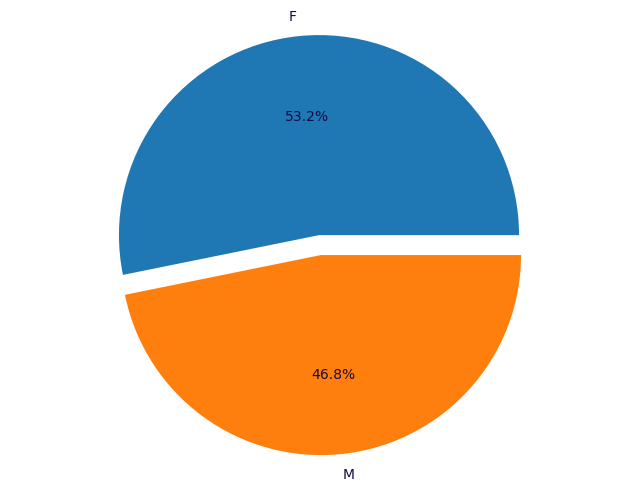

In [91]:
import matplotlib.pyplot as plt

# Menggunakan Matplotlib
plt.figure(figsize=(8, 6))
plt.pie(gender_data['count'],
        labels=gender_data['payCardSex'],
        autopct='%.1f%%',
        explode=[0.1, 0],
        textprops={'color': '#170845'})
plt.axis('equal')

# Tampilkan diagram
plt.show()

Dari kolom "payCardSex" kita bisa mengetahui gender yang terdaftar pada kepemilikan kartu atau pay card owner.
Dapat dilihat bahwa penumpang wanita lebih banyak sejumlah 6.4% dibandingkan dengan penumpang pria. Dari persentase ini memang diketahui bahwa perbedaan proporsi keduanya tidak terlalu besar. Namun terkait dengan kebijakan inklusif armada khusus wanita dengan tujuan memberikan rasa aman akan kejahatan seksual yang kerap terjadi di area operasional transjakarta, maka proporsi ini dapat dijadikan acuan bahwa penumpang wanita masih mendominasi dan kebijakan Transjakarta dalam memberikan fasilitas bus khusus wanita sudah sesuai dan tepat sasaran.

2. Koridor Paling Ramai dengan Penumpang Wanita
Untuk memprioritaskan perempuan dengan memperbanyak armada khusus wanita maka kita perlu mengetahui koridor mana yang ramai dengan Penumpang Wanita sehingga armada khusus wanita akan ditambahkan pada koridor tersebut

In [92]:
female_df = df[df['payCardSex'] == 'F']

In [93]:
corridor_female_df = female_df['corridorName'].value_counts().reset_index()
corridor_female_df=corridor_female_df.sort_values(by='count', ascending=False).head(5)
corridor_female_df

,corridorName,count
0,Pasar Minggu - Tanah Abang,235
1,Rusun Rawa Bebek - Kodamar,222
2,Poris Plawad - Bundaran Senayan,218
3,Cilangkap - Cililitan,208
4,Terminal Tanah Merah - Pulo Gadung,208


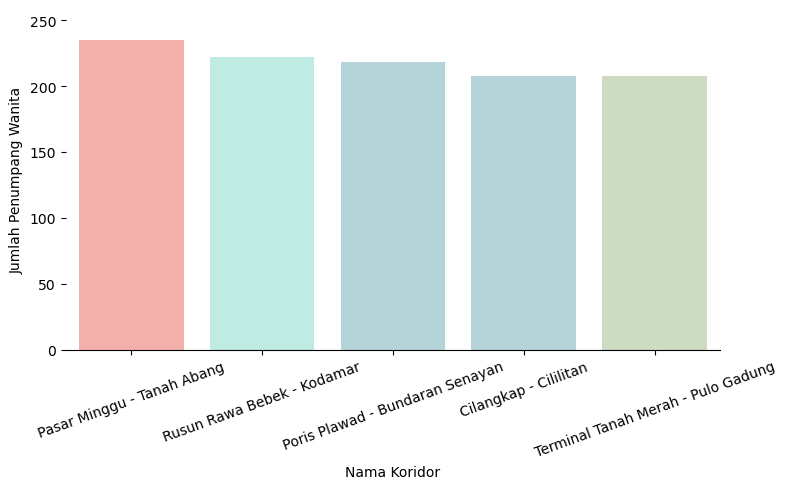

In [98]:
import seaborn as sns  # Mengimpor Seaborn
import matplotlib.pyplot as plt  # Mengimpor Matplotlib

# Menggunakan Seaborn
transjakarta2_colors = ['#ffa69e', '#b8f2e6', '#aed9e0', '#aed9e0', '#cbdfbd']
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='corridorName', y='count', data=corridor_female_df, palette=transjakarta2_colors)
plt.xlabel('Nama Koridor')
plt.ylabel('Jumlah Penumpang Wanita')
plt.xticks(rotation=20)
plt.ylim(0, corridor_female_df['count'].max() * 1.1)
sns.despine(left=True, top=True)
max_count = corridor_female_df['count'].max()
ax.grid(False)

plt.tight_layout()

# Tampilkan plot
plt.show()

Melalui data ini dapat dijadikan bahan pertimbangan kebijakan pemerintah dalam membuat kebijakan untuk memprioritaskan penambahan armada khusus wanita di kelima koridor tersebut

3. Koridor yang Paling Ramai dengan Penumpang

In [99]:
corridorInfo = df.groupby(['corridorID', 'corridorName']).size().reset_index(name='Count')
corridorInfoTop10 = corridorInfo.sort_values(by='Count', ascending=False).head(5)
corridorInfoTop10

,corridorID,corridorName,Count
40,1T,Cibubur - Balai Kota,405
216,S21,Ciputat - CSW,395
196,JIS3,Harmoni - Jakarta International Stadium,351
93,8C,Kebayoran Lama - Tanah Abang,347
120,JAK.06,Kampung Rambutan - Pondok Gede,343


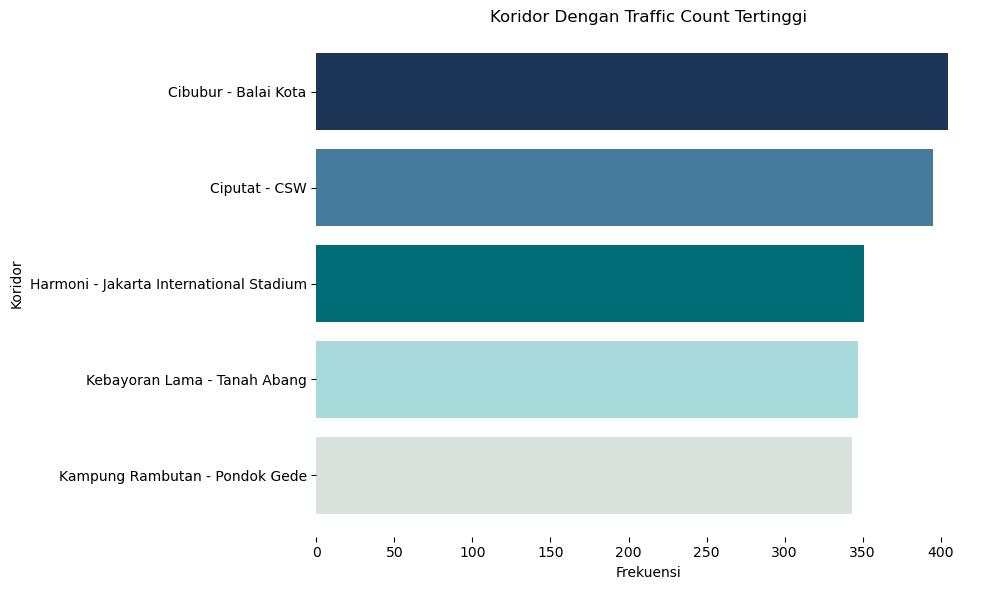

In [100]:
plt.figure(figsize=(10, 6))
plt.barh(corridorInfoTop10['corridorName'], corridorInfoTop10['Count'], color=['#1d3557','#457b9d','#006d77','#a8dadc', '#d8e2dc'])
plt.xlabel('Frekuensi')
plt.ylabel('Koridor')
plt.title('Koridor Dengan Traffic Count Tertinggi')
plt.gca().invert_yaxis()
plt.grid(False)

for ax in plt.gcf().get_axes():
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)


plt.tight_layout()
plt.show()

Jurusan Cibubur-Balai Kota adalah koridor yang paling sering digunakan penumpang dimana halte pada koridor ini merupakan akses ke wilayah perkantoran di jakarta. Koridor Cibubur-Balai Kota dan Ciputat-CSW melintas wilayah jakarta pusat-jakarta selatan yang artinya koridor yang melintas disekitar wilayah jakarta pusat dan selatan lebih padat dibandingkan koridor lainnya. Hal ini bisa jadi bahan referensi PT. Transjakarta dalam efisiensi koridor dan armada secara keseluruhan dan dapat berfokus diwilayah ini, karena diluar jam sibuk pun koridor ini ramai digunakan.

4. Jam Sibuk
Permasalahan overcrowded banyak terjadi dikarenakan penuhnya penumpang melebihi dari batas normal dikarenakan jam berangkat kerja dan pulang kerja yang hampir bersamaan antar kantor. Kita perlu mengetahui kapan jam sibuk penggunaan transjakarta agar dapat meningkatkan efisiensi dan optimalisasi dari penggunaaan transjakarta

In [101]:
# Peak Hour per hari
rush_hour= pd.crosstab(df['tapInDay'], df['tapInHour'])
rush_hour

tapInHour,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
tapInDay,,,,,,,,,,,,,,,,,
Friday,637,1115,504,540,525,25,29,26,27,2,34,640,1038,428,454,434,393
Monday,620,1145,546,514,500,14,29,16,35,1,26,620,1049,438,457,450,378
Saturday,117,100,95,123,109,95,95,114,101,82,122,123,144,113,111,106,80
Sunday,108,103,120,118,98,101,106,99,120,89,127,109,121,116,124,135,78
Thursday,643,1112,507,537,519,20,27,21,28,3,38,615,1031,467,427,426,413
Tuesday,616,1143,542,510,517,16,27,28,20,2,28,621,1048,432,431,454,400
Wednesday,617,1121,498,538,539,28,26,33,17,2,33,637,1057,444,451,403,396


In [102]:
orderbyday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rush_hour = rush_hour.reindex(orderbyday)

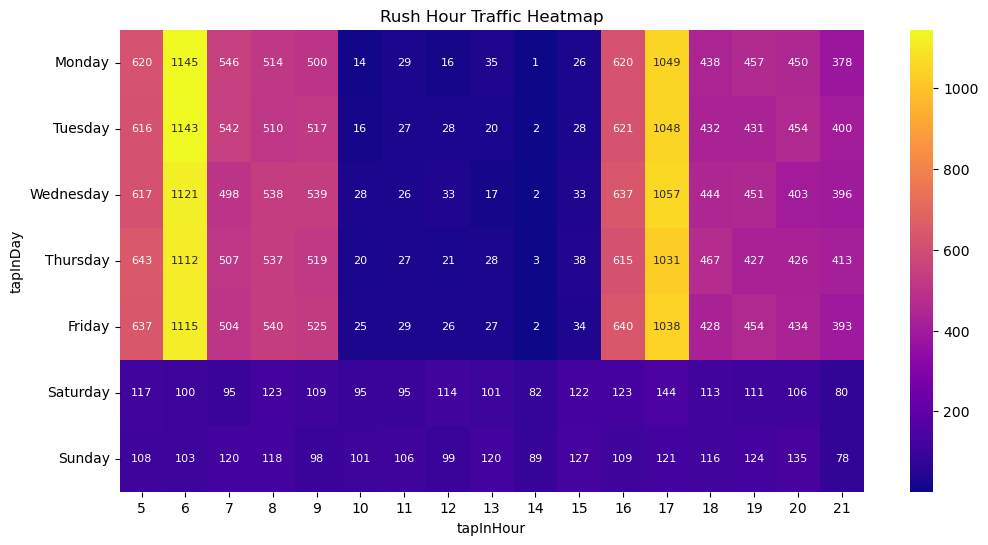

In [107]:
custom_colors = ["#FFE4C4", "#87CEEB", "#FFD700"]

plt.figure(figsize=(12, 6))
sns.set_palette(custom_colors)
sns.heatmap(rush_hour, annot=True,
            annot_kws={'size': 8}, fmt='.0f',
            cmap='plasma')
plt.title('Rush Hour Traffic Heatmap')
plt.show()

Dapat disimpulkan bahwa waktu sibuk penggunaan transjakarta adalah di jam 05.00-09.00 (saat jam berangkat kerja) dan di jam 16.00-21.00 (saat jam pulang kerja). Selain itu, terlihat juga bahwa pada hari kerja sangat jauh lebih padat dibanding pada akhir pekan. Dari analisis jam sibuk ini, dapat dijadikan pertimbangan dalam optimalisasi dan efisiensi dalam meningkatkan kualitas dan kenyamanan penumpang.

5. Koridor Teramai Saat Jam Sibuk
Analisis ini dapat menjadi bahan pertimbangan perusahaan dalam meningkatkan efisiensi dan dapat menjadi informasi untuk para penumpang yang ingin menghindari koridor crowded (untuk penumpang yang menghindari antre dan tetap mempertahankan kenyamanan).

In [112]:
morning_rush_hour = df[df['rush_hour'] == "Morning Rush Hour"].groupby(['corridorID', 'corridorName']).size().reset_index(name='Count')
morning_rush_hour = morning_rush_hour.sort_values(by='Count', ascending=False).head(5)
morning_rush_hour

,corridorID,corridorName,Count
40,1T,Cibubur - Balai Kota,202
216,S21,Ciputat - CSW,192
93,8C,Kebayoran Lama - Tanah Abang,169
120,JAK.06,Kampung Rambutan - Pondok Gede,169
14,11P,Rusun Pondok Bambu - Walikota Jakarta Timur,168


In [113]:
evening_rush_hour= df[df['rush_hour'] == "Evening Rush Hour"].groupby(['corridorID', 'corridorName']).size().reset_index(name='Count')
evening_rush_hour= evening_rush_hour.sort_values(by='Count', ascending=False).head(5)
evening_rush_hour

,corridorID,corridorName,Count
40,1T,Cibubur - Balai Kota,174
196,JIS3,Harmoni - Jakarta International Stadium,157
93,8C,Kebayoran Lama - Tanah Abang,155
216,S21,Ciputat - CSW,147
14,11P,Rusun Pondok Bambu - Walikota Jakarta Timur,146


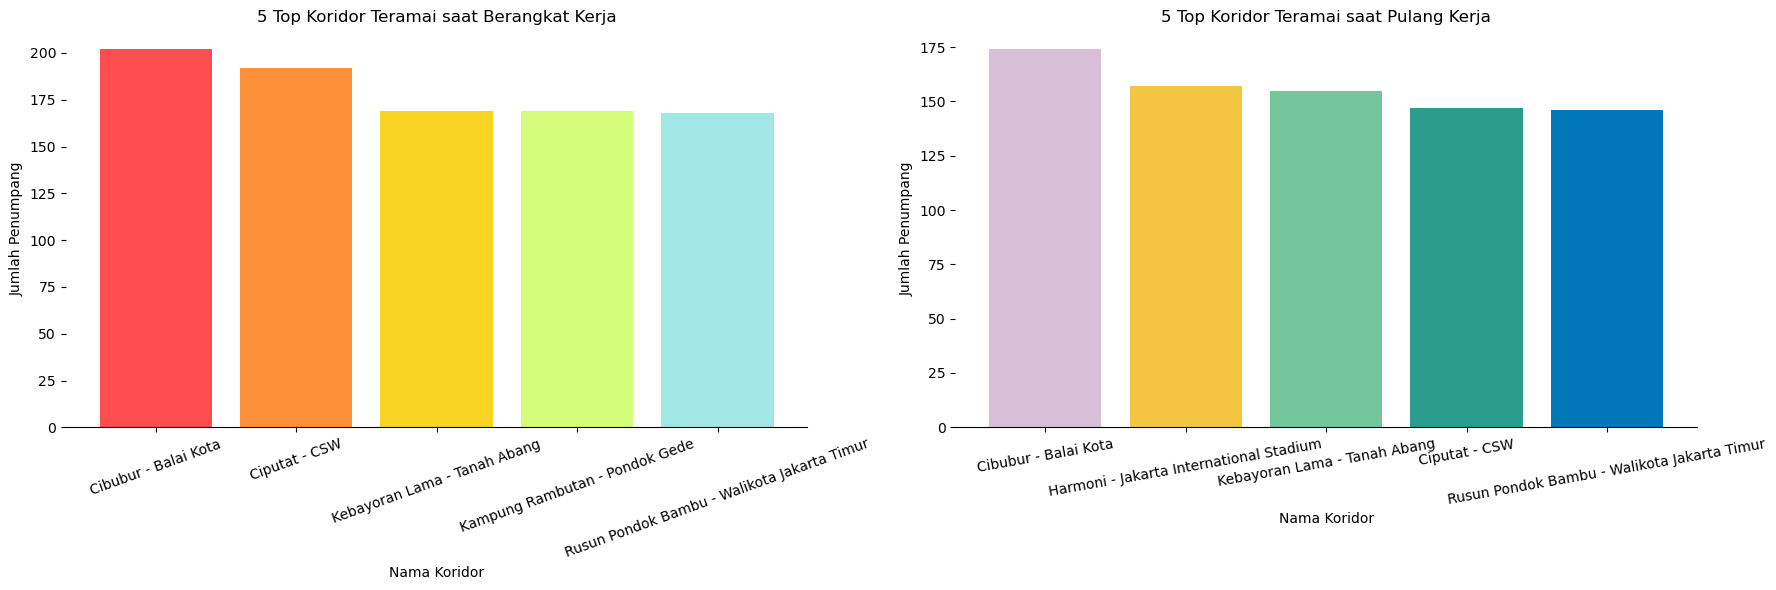

In [116]:
custom_colors_new = ["#ff4e50", "#fc913a", "#f9d423", "#d4fc79", "#a0e7e5", "#6d77a4"]
custom_colors1_new = ["#d8bfd8", "#f4c542", "#74c69d", "#2a9d8f", "#0077b6", "#56ccf2"]

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].bar(morning_rush_hour['corridorName'], morning_rush_hour['Count'], color=custom_colors_new)
axes[0].set_title('5 Top Koridor Teramai saat Berangkat Kerja')
axes[0].set_xlabel('Nama Koridor')
axes[0].set_ylabel('Jumlah Penumpang')
axes[0].tick_params(axis='x', rotation=20)
axes[0].grid(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_visible(False)

axes[1].bar(evening_rush_hour['corridorName'], evening_rush_hour['Count'], color=custom_colors1_new)
axes[1].set_title('5 Top Koridor Teramai saat Pulang Kerja')
axes[1].set_xlabel('Nama Koridor')
axes[1].set_ylabel('Jumlah Penumpang')
axes[1].tick_params(axis='x', rotation=10)
axes[1].grid(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)

plt.tight_layout()

plt.show()


Dapat disimpulkan bahwa:
1. Koridor Cibubur-Balaikota merupakan koridor yang sering dipakai pada waktu sibuk pagi maupun sore dikarenakan koridor ini melalui wilayah perkantoran yang mana penumpang pada jam sibuk adalah para karyawan kantoran.
2. Koridor-koridor diatas dapat menjadi prioritas PT Transjakarta dalam menambah armada sesuai kebutuhahan, kapasitas, dan waktu sibuk

6. Halte tersibuk
Setelah mengetahui koridor teramai, untuk spesifiknya kita perlu mengetahui halte mana yang paling sibuk dan padat penumpang untuk meningkatkan layanan di halte tersebut.

a. TapIn

In [117]:
# Pagi Hari (05.00 - 09.00)
morning_rush_tapIn= df[df['rush_hour'] == "Morning Rush Hour"].groupby(['tapInStops', 'tapInStopsName']).size().reset_index(name='Count')
morning_rush_tapIn= morning_rush_tapIn.sort_values(by='Count', ascending=False).head(5)
morning_rush_tapIn

,tapInStops,tapInStopsName,Count
1185,P00064,Garuda Taman Mini,143
611,B03277P,Rusun Kapuk Muara,104
1261,P00170,Penjaringan,91
1285,P00202,Rawa Selatan,85
1324,P00254,Tendean,84


In [118]:
# Jam Pulang Kerja (16.00-21.00)
evening_rush_tapIn= df[df['rush_hour'] == "Evening Rush Hour"].groupby(['tapInStops', 'tapInStopsName']).size().reset_index(name='Count')
evening_rush_tapIn= evening_rush_tapIn.sort_values(by='Count', ascending=False).head(5)
evening_rush_tapIn

,tapInStops,tapInStopsName,Count
1241,P00170,Penjaringan,132
63,B00248P,Cibubur Junction,105
1124,P00016,BKN,93
1323,P00297,BNN LRT,85
1236,P00164,Pejaten,85


b. Tap Out

In [119]:
# Pagi Hari (05.00 - 09.00)
morning_rush_tapOut= df[df['rush_hour'] == "Morning Rush Hour"].groupby(['tapOutStops', 'tapOutStopsName']).size().reset_index(name='Count')
morning_rush_tapOut= morning_rush_tapOut.sort_values(by='Count', ascending=False).head(5)
morning_rush_tapOut

,tapOutStops,tapOutStopsName,Count
1120,P00170,Penjaringan,166
1016,P00016,BKN,159
1095,P00137,Monas,140
1082,P00112,Kejaksaan Agung,102
38,B00221P,Bundaran Senayan 1,98


In [120]:
# Jam Pulang Kerja (16.00-21.00)
evening_rush_tapOut= df[df['rush_hour'] == "Evening Rush Hour"].groupby(['tapOutStops', 'tapOutStopsName']).size().reset_index(name='Count')
evening_rush_tapOut= evening_rush_tapOut.sort_values(by='Count', ascending=False).head(5)
evening_rush_tapOut

,tapOutStops,tapOutStopsName,Count
1024,P00016,BKN,134
857,B05725P,Term. Senen,120
1136,P00179,Pinang Ranti,97
848,B05708P,Term. Kampung Rambutan,89
525,B03277P,Rusun Kapuk Muara,87


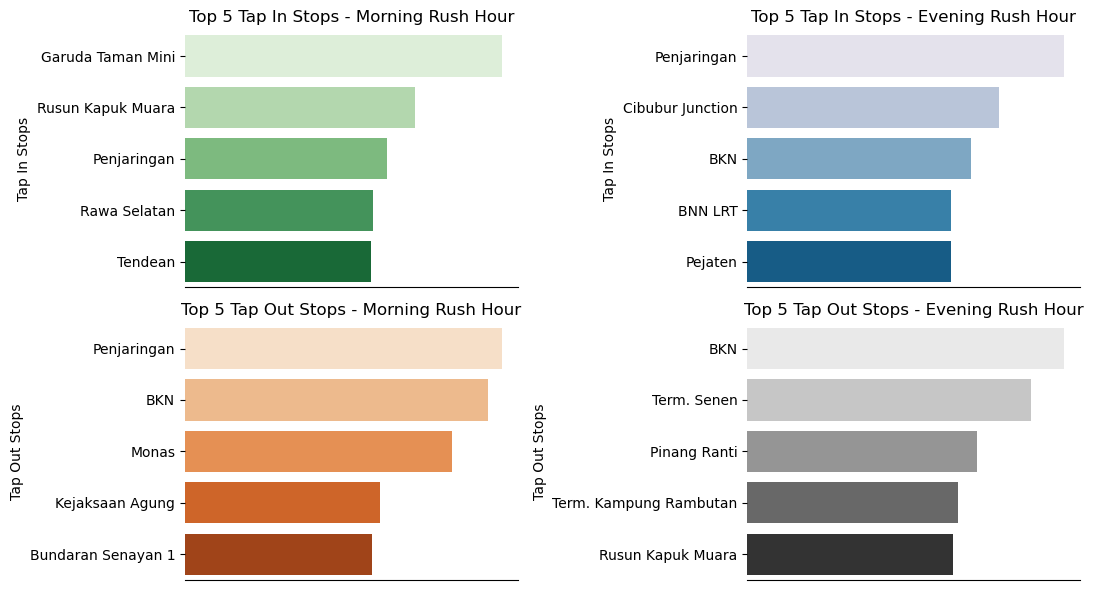

In [126]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 6))
ax1 = sns.barplot(x='Count', y='tapInStopsName', data=morning_rush_tapIn.head(5), palette='Greens', linewidth=0, edgecolor='none', ax=axes[0, 0])
ax1.set_title('Top 5 Tap In Stops - Morning Rush Hour')
ax1.set_xlabel('')
ax1.set_ylabel('Tap In Stops')
ax1.set_xticks([]) 
ax1.grid(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax2 = sns.barplot(x='Count', y='tapInStopsName', data=evening_rush_tapIn.head(5), palette='PuBu', linewidth=0, edgecolor='none', ax=axes[0, 1])
ax2.set_title('Top 5 Tap In Stops - Evening Rush Hour')
ax2.set_ylabel('Tap In Stops')
ax2.set_xlabel('')
ax2.set_xticks([]) 
ax2.grid(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax3 = sns.barplot(x='Count', y='tapOutStopsName', data=morning_rush_tapOut.head(5), palette='Oranges', linewidth=0, edgecolor='none', ax=axes[1, 0])
ax3.set_title('Top 5 Tap Out Stops - Morning Rush Hour')
ax3.set_xlabel('')
ax3.set_ylabel('Tap Out Stops')
ax3.set_xticks([])
ax3.grid(False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

ax4 = sns.barplot(x='Count', y='tapOutStopsName', data=evening_rush_tapOut.head(5), palette='Greys', linewidth=0, edgecolor='none', ax=axes[1, 1])
ax4.set_title('Top 5 Tap Out Stops - Evening Rush Hour')
ax4.set_xlabel('')
ax4.set_ylabel('Tap Out Stops')
ax4.set_xticks([])
ax4.grid(False)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

Dari data diatas dapat disimpulkan:
1. Optimalisasi fasilitas dapat memprioritaskan halte Garuda Taman Mini, Penjaringan, BKN, Terminal Senen, Cibubur Junction, Rusun Kapuk Muara dan Monas. Dimana optimalisasi fasilitas bisa berupa revitalisasi/memperbesar halte, menambah kipas agar penumpang tidak kepanasan, dan peningkatan keamanan.
2. Dengan mengetahui halte mana saja yang padat, maka skema revitalisasi Transjakarta akan tepat sasaran.

# KESIMPULAN
Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan berikut tentang data Transjakarta :
1. Penumpang wanita lebih banyak daripada penumpang pria, maka kebijakan armada khusus wanita sudah tepat. Data koridor paling banyak digunakan penumpang wanita dapat menjadi bahan pertimbangan dalam urgensi menambah armada khusus bagi penumpang wanita.
2. 3 Koridor yang perlu menambah bus khusus wanita adalah adalah koridor Pasar Minggu - Tanah Abang, Poris Plawad - Bundaran Senayan, dan Rusun Rawa Bebek – Kodamar.
3. Jam sibuk di pagi hari terjadi antara pukul 05.00 - 09.00, sedangkan jam sibuk di sore hari terjadi antara pukul 16.00-21.00
4. Koridor Cibubur-Balai Kota merupakan koridor terpadat pada waktu sibuk pagi dan sore hari
5. Halte yang belum dilakukan revitalisasi dan perluasan namun padat penumpang garuda taman-mini, rusun muara-kapuk, penjaringan,rawa-selatan, cibubur junction


# REKOMENDASI
1. Meningkatkan layanan bus khusus wanita dengan menambah armada pada koridor-koridor yang banyak digunakan oleh penumpang Wanita seperti pada koridor Pasar Minggu-Tanah Abang, Rusun Rawa Bebek-Kodamar, Poris-Bundaran Senayan, Cilangkap-Cililitan dan Terminal Tanah Merah-Pulo Gadung.
2. Peningkatan armada dapat dilakukan dengan mengalihkan bus yang beroperasi dikoridor yang tidak padat ke koridor yang padat.
3. Melakukan pembaruan dan perluasan pada halte-halte dengan tingkat penumpang tinggi, khususnya di area yang strategis seperti Garuda Taman Mini, Penjaringan, dan BKN.
4. Memastikan ketersediaan bus sesuai dengan jumlah penumpang pada jam sibuk.
5. Memperbaiki dan meningkatkan sarana dan prasarana demi kenyamanan penumpang yang mengantri di halte yang crowded dengan penumpang.

# TABLEAU
https://public.tableau.com/app/profile/claudya.ruth/viz/CapstoneProject2-Claudya/Dashboard1
